Loading the Data

In [2]:
import pandas as pd
import re
import string

youtube = pd.read_csv('youtube.csv', encoding = "ISO-8859-1")

youtube.head()

,link,title,description,category
0,JLZlCZ0,Ep 1| Travelling through North East India | Of...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,travel
1,i9E_Blai8vk,Welcome to Bali | Travel Vlog | Priscilla Lee,Priscilla Lee\n45.6K subscribers\nSUBSCRIBE\n*...,travel
2,r284c-q8oY,My Solo Trip to ALASKA | Cruising From Vancouv...,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,travel
3,Qmi-Xwq-ME,Traveling to the Happiest Country in the World!!,Yes Theory\n6.65M subscribers\nSUBSCRIBE\n*BLA...,travel
4,_lcOX55Ef70,Solo in Paro Bhutan | Tiger's Nest visit | Bhu...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,travel


Cleaning the data

In [3]:
youtube.category.unique()

array(['travel', 'food', 'art_music', 'history'], dtype=object)

In [4]:
youtube.describe()

,link,title,description,category
count,3599,3599,3599,3599
unique,3432,3399,3251,4
top,#NAME?,New Hindi Song 2021 May ð Top Bollywood Rom...,Travel Thirsty\n6.61M subscribers\nSUBSCRIBE,travel
freq,63,24,39,1156


Preprcessing the data

In [5]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
youtube['category']= label_encoder.fit_transform(youtube['category'])
youtube
                                 

,link,title,description,category
0,JLZlCZ0,Ep 1| Travelling through North East India | Of...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,3
1,i9E_Blai8vk,Welcome to Bali | Travel Vlog | Priscilla Lee,Priscilla Lee\n45.6K subscribers\nSUBSCRIBE\n*...,3
2,r284c-q8oY,My Solo Trip to ALASKA | Cruising From Vancouv...,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,3
3,Qmi-Xwq-ME,Traveling to the Happiest Country in the World!!,Yes Theory\n6.65M subscribers\nSUBSCRIBE\n*BLA...,3
4,_lcOX55Ef70,Solo in Paro Bhutan | Tiger's Nest visit | Bhu...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,3
...,...,...,...,...
3594,#NAME?,21st Century Challenges: Crash Course European...,CrashCourse\n12.4M subscribers\nSUBSCRIBE\nThe...,2
3595,d-2Trw8bCa0,EU DataViz webinar - Barnaby Skinner - How to ...,Publications Office of the European Union\n3.2...,2
3596,RCKWarkUL,Stone Age Scandinavia: First People In the Nor...,History Time\n619K subscribers\nSUBSCRIBE\n- W...,2
3597,MF6F3BxJIY,AP European History - Interwar Period: Paris P...,Mr. Raymond's Civics and Social Studies Academ...,2


In [6]:
#Making sure that all the inconsistencies are taken care of in every row of the dataset. 
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[0-9" "]+', " ", text)
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n', " ", text)
    return text

clean = lambda x: clean_text(x)

In [7]:
youtube['description'] = youtube.description.apply(clean)

youtube['title'] = youtube.title.apply(clean)


In [8]:
youtube.head()

,link,title,description,category
0,JLZlCZ0,ep travelling through north east india off to ...,tanya khanijow subscribers subscribe the jour...,3
1,i9E_Blai8vk,welcome to bali travel vlog priscilla lee,priscilla lee subscribers subscribe disclaime...,3
2,r284c-q8oY,my solo trip to alaska cruising from vancouver...,allison anderson subscribers subscribe i spen...,3
3,Qmi-Xwq-ME,traveling to the happiest country in the world,yes theory subscribers subscribe black friday...,3
4,_lcOX55Ef70,solo in paro bhutan tigers nest visit bhutan t...,tanya khanijow subscribers subscribe hereâs...,3


Getting the top used words in our feature columns.

In [9]:
word_freq_title = pd.Series(" ".join(youtube['title']).split()).value_counts()[:10]

word_freq_description = pd.Series(' '.join(youtube['description']).split()).value_counts()[:10]

print(word_freq_title)
print(word_freq_description)

in         1021
food        947
songs       899
indian      717
history     530
of          530
the         510
vlog        443
germany     437
travel      432
dtype: int64
the            7204
and            4898
to             4590
subscribe      4381
of             4159
more           3963
in             3948
show           3406
subscribers    3071
a              2939
dtype: int64


Stopwards

In [10]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

youtube['title'] = youtube['title'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

youtube['description'] = youtube['description'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

youtube.head()

,link,title,description,category
0,JLZlCZ0,ep travelling north east india arunachal journ...,tanya khanijow subscribers subscribe journey a...,3
1,i9E_Blai8vk,welcome bali travel vlog priscilla lee,priscilla lee subscribers subscribe disclaimer...,3
2,r284c-q8oY,solo trip alaska cruising vancouver anchorage,allison anderson subscribers subscribe spent d...,3
3,Qmi-Xwq-ME,traveling happiest country world,yes theory subscribers subscribe black friday ...,3
4,_lcOX55Ef70,solo paro bhutan tigers nest visit bhutan trav...,tanya khanijow subscribers subscribe hereâs ...,3


Word Frequency with Stopword removal 

In [11]:
word_freq_t_2 = pd.Series(" ".join(youtube['title']).split()).value_counts()[:10]

word_freq_d_2 = pd.Series(" ".join(youtube['description']).split()).value_counts()[:10]

print(word_freq_t_2)

print(word_freq_d_2)

food       947
songs      899
indian     717
history    530
vlog       443
germany    437
travel     432
best       421
new        385
music      371
dtype: int64
subscribe      4381
show           3406
subscribers    3071
songs          2073
video          1449
food           1428
hindi          1386
music          1324
travel         1232
song           1128
dtype: int64


N-grams

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
def bi_gram_func(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), max_features=1000).fit(corpus)
    bow = vec.transform(corpus)
    sum_words = bow.sum(axis=0)
    word_freq = [(word, sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key= lambda x: x[1], reverse=True)
    return word_freq[:n]

Bi-grams

In [13]:
top_2_words = bi_gram_func(youtube['title'], n=200)
top_2_words = pd.DataFrame(top_2_words)
top_2_words.columns=('bi_grams','Frequency')
top_2_words[:12]

,bi_grams,Frequency
0,indian food,273
1,pop music,217
2,street food,207
3,english songs,196
4,japanese food,143
5,european history,101
6,travel vlog,98
7,travel blogs,97
8,à² à²,97
9,songs best,97


In [14]:
top_2_words = bi_gram_func(youtube['description'], n=200)
top_2_words = pd.DataFrame(top_2_words)
top_2_words.columns=('bi_grams','Frequency')
top_2_words[:12]

,bi_grams,Frequency
0,subscribers subscribe,2813
1,indian food,358
2,¾à ¾à,275
3,pop music,265
4,english songs,260
5,travel vlog,249
6,street food,248
7,join subscribe,241
8,subscribers join,240
9,song hindi,229


Visualizing our bigrams.

[Text(0, 0, 'subscribers subscribe'),
 Text(1, 0, 'indian food'),
 Text(2, 0, '¾à ¾à'),
 Text(3, 0, 'pop music'),
 Text(4, 0, 'english songs'),
 Text(5, 0, 'travel vlog'),
 Text(6, 0, 'street food'),
 Text(7, 0, 'join subscribe'),
 Text(8, 0, 'subscribers join'),
 Text(9, 0, 'song hindi')]

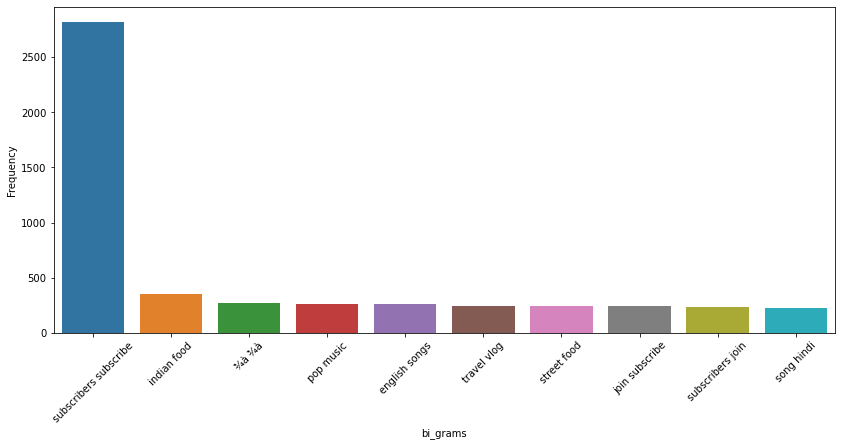

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_bigrams = top_2_words.iloc[0:10,:]

fig = plt.figure(figsize=(14,6))
plot = sns.barplot(x=top_10_bigrams['bi_grams'], y=top_10_bigrams['Frequency'])
plot.set_xticklabels(rotation = 45, labels = top_10_bigrams['bi_grams'])

Tri-grams

In [16]:
def tri_grams(corpus, n=None):
    vec2 = CountVectorizer(ngram_range=(3,3), max_features=1000).fit(corpus)
    bow = vec2.transform(corpus)
    sum_words = bow.sum(axis=0)
    word_count = [(word, sum_words[0,idx]) for word, idx in vec2.vocabulary_.items()]
    word_count = sorted(word_count, key = lambda x: x[1], reverse=True)
    return word_count[:n]

In [17]:

tri_top_10 = tri_grams(youtube['title'], n=200)
tri_top_10 = pd.DataFrame(tri_top_10)
tri_top_10.columns = ('tri_grams', 'frequency')
tri_top_10[:13]

,tri_grams,frequency
0,latest english songs,74
1,pop music new,67
2,music new song,63
3,english songs pop,60
4,indian street food,56
5,songs pop music,54
6,best pop music,54
7,à² à² à²,52
8,japanese street food,52
9,new songs latest,52


In [18]:
tri_top_10 = tri_grams(youtube['description'], n=200)
tri_top_10 = pd.DataFrame(tri_top_10)
tri_top_10.columns = ('tri_grams', 'frequency')
tri_top_10[:13]

,tri_grams,frequency
0,subscribers join subscribe,240
1,¼â ¼â ¼â,193
2,bollywood hits songs,112
3,dhum tara dhum,100
4,tara dhum tara,100
5,vlogs subscribers subscribe,96
6,¾à ¹à ¾à,89
7,best pop music,87
8,latest english songs,86
9,new hindi song,86


Visualizing Tri-grams

[Text(0, 0, 'subscribers join subscribe'),
 Text(1, 0, '¼â ¼â ¼â'),
 Text(2, 0, 'bollywood hits songs'),
 Text(3, 0, 'dhum tara dhum'),
 Text(4, 0, 'tara dhum tara'),
 Text(5, 0, 'vlogs subscribers subscribe'),
 Text(6, 0, '¾à ¹à ¾à'),
 Text(7, 0, 'best pop music'),
 Text(8, 0, 'latest english songs'),
 Text(9, 0, 'new hindi song')]

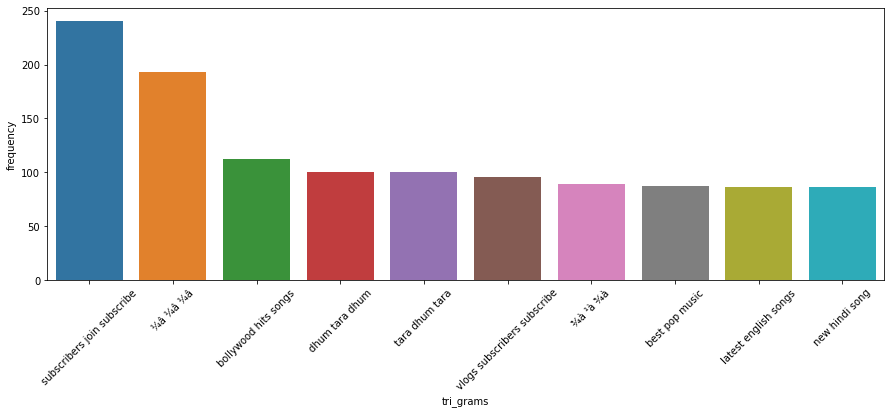

In [19]:
tri_gram_graph = tri_top_10.iloc[:10,:]

fig = plt.figure(figsize = (15,5))
plot = sns.barplot(x=tri_gram_graph['tri_grams'], y=tri_gram_graph['frequency'])
plot.set_xticklabels(rotation=45, labels = tri_gram_graph['tri_grams'])

Four-Grams

In [20]:
def four_grams(corpus, n=None):
    vec2 = CountVectorizer(ngram_range=(4,4), max_features=1000).fit(corpus)
    bow = vec2.transform(corpus)
    sum_words = bow.sum(axis=0)
    word_count = [(word, sum_words[0,idx]) for word, idx in vec2.vocabulary_.items()]
    word_count = sorted(word_count, key = lambda x: x[1], reverse=True)
    return word_count[:n]

In [21]:
four_top_10 = four_grams(youtube['title'], n=200)
four_top_10 = pd.DataFrame(four_top_10)
four_top_10.columns = ('four_grams', 'frequency')
four_top_10[:13]

,four_grams,frequency
0,pop music new song,63
1,latest english songs pop,57
2,english songs pop music,53
3,songs pop music new,53
4,new songs latest english,52
5,songs latest english songs,51
6,crash course european history,50
7,bollywood romantic love songs,45
8,best pop music playlist,43
9,music new song english,42


In [22]:
four_top_10 = four_grams(youtube['description'], n=200)
four_top_10 = pd.DataFrame(four_top_10)
four_top_10.columns = ('four_grams', 'frequency')
four_top_10[:13]

,four_grams,frequency
0,¼â ¼â ¼â ¼â,184
1,dhum tara dhum tara,100
2,tara dhum tara dhum,80
3,dont forget like share,75
4,forget like share mix,69
5,like share mix enjoy,69
6,social sites facebook google,69
7,sites facebook google twitter,69
8,facebook google twitter etc,68
9,google twitter etc people,68


Visualizing Four Grams.

[Text(0, 0, '¼â ¼â ¼â ¼â'),
 Text(1, 0, 'dhum tara dhum tara'),
 Text(2, 0, 'tara dhum tara dhum'),
 Text(3, 0, 'dont forget like share'),
 Text(4, 0, 'forget like share mix'),
 Text(5, 0, 'like share mix enjoy'),
 Text(6, 0, 'social sites facebook google'),
 Text(7, 0, 'sites facebook google twitter'),
 Text(8, 0, 'facebook google twitter etc'),
 Text(9, 0, 'google twitter etc people')]

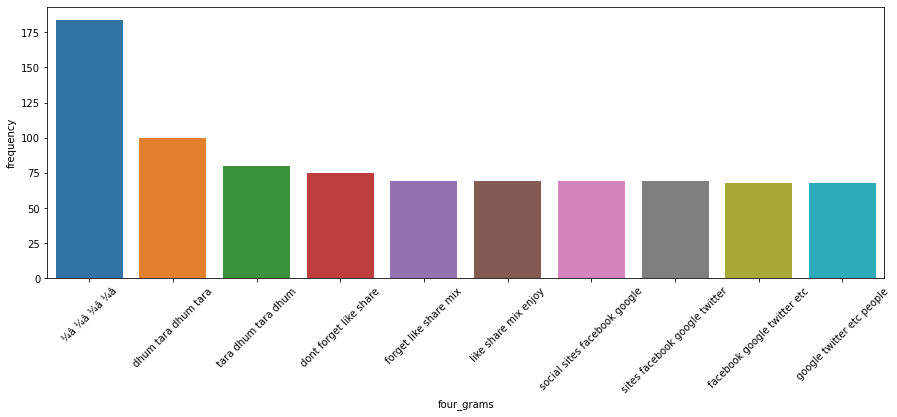

In [23]:
four_gram_graph = four_top_10.iloc[:10,:]

fig = plt.figure(figsize = (15,5))
plot = sns.barplot(x=four_gram_graph['four_grams'], y=four_gram_graph['frequency'])
plot.set_xticklabels(rotation=45, labels = four_gram_graph['four_grams'])

Count Vectorizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
vectorizer = CountVectorizer(min_df = 0.1, max_df= 0.9)
X = vectorizer.fit_transform(youtube['title'])
title_word_freq_df = pd.DataFrame({'term':vectorizer.get_feature_names(), 'occurrences': np.asarray(X.sum(axis=0)).ravel().tolist()})
title_word_freq_df['frequency'] = title_word_freq_df['occurrences']/np.sum(title_word_freq_df['occurrences'])

title_word_freq_df.head()


,term,occurrences,frequency
0,best,422,0.096040
1,food,947,0.215521
2,history,530,0.120619
3,indian,721,0.164087
4,songs,899,0.204597


TfidfVectorizer

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english', max_features=1000, max_df = 0.5, smooth_idf=True)
doc_vec = vect.fit_transform(youtube['title'])
names_features = vect.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()

df = pd.DataFrame(denselist, columns  = names_features)

df

,aamir,abhijit,abstract,academy,acoustic,acrylic,ad,adele,affiliate,africa,...,ºð,¼à,¼ã,¾à,à²,à²²à²,à²²à³,à²¾à²,à³,àµ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
def split_into_words(i):
    return (i.split(" "))

Title Model Building 

In [27]:
youtube_title = youtube[['title', 'category']]

youtube_title

,title,category
0,ep travelling north east india arunachal journ...,3
1,welcome bali travel vlog priscilla lee,3
2,solo trip alaska cruising vancouver anchorage,3
3,traveling happiest country world,3
4,solo paro bhutan tigers nest visit bhutan trav...,3
...,...,...
3594,century challenges crash course european history,2
3595,eu dataviz webinar barnaby skinner make data e...,2
3596,stone age scandinavia first people north bc,2
3597,ap european history interwar period paris peac...,2


Splitting the data using Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

title_train, title_test = train_test_split(youtube_title, test_size = 0.30)

title_bow = CountVectorizer(analyzer= split_into_words).fit(youtube_title.title)

Transforming the data

In [29]:

all_title_matrix = title_bow.transform(youtube_title.title)
train_title_matrix  = title_bow.transform(title_train.title)
test_title_matrix = title_bow.transform(title_test.title)


MultinomialNB Model.

In [30]:
from sklearn.naive_bayes import MultinomialNB as MB

classifier_mb = MB()
classifier_mb.fit(train_title_matrix, title_train.category)
train_pred_m = classifier_mb.predict(train_title_matrix)
score_train_MB = classifier_mb.score(train_title_matrix, title_train.category)
print(score_train_MB)

test_pred_mb = classifier_mb.predict(test_title_matrix)
score_test_MB = classifier_mb.score(test_title_matrix, title_test.category)
print(score_test_MB)


0.9908693926161175
0.9777777777777777


GaussianNB Model.

In [31]:
from sklearn.naive_bayes import GaussianNB as GB
import numpy

gb_classifier = GB()

gb_train_fit = gb_classifier.fit(train_title_matrix.toarray(), title_train.category.values)
gb_train_pred = gb_classifier.predict(train_title_matrix.toarray())

gb_score = np.mean(gb_train_pred == title_train.category)
print(gb_score)

gb_test_pred = gb_classifier.predict(test_title_matrix.toarray())
gb_test_score = np.mean(gb_test_pred == title_test.category)
print(gb_test_score)




0.9880905121079794
0.8962962962962963


Modeling with TfidfTransformer. 

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer().fit(all_title_matrix)

tfidf_train_matrix = tfidf.transform(train_title_matrix)
tfidf_test_matrix = tfidf.transform(test_title_matrix)


In [33]:
#tfidf MultinomialNB
tfidf_train_fitting = classifier_mb.fit(tfidf_train_matrix, title_train.category)
tfidf_train_pred = classifier_mb.predict(tfidf_train_matrix)
tfidf_train_score = np.mean(tfidf_train_pred == title_train.category)

print(tfidf_train_score)

tfidf_test_pred = classifier_mb.predict(tfidf_test_matrix)
tfidf_test_score = np.mean(tfidf_test_pred == title_test.category)
print(tfidf_test_score)

0.9912663755458515
0.9638888888888889


In [34]:
#TFIDF GaussianNB

gb_classifier = GB()

gb_train_fit = gb_classifier.fit(tfidf_train_matrix.toarray(), title_train.category.values)
gb_train_pred = gb_classifier.predict(tfidf_train_matrix.toarray())

gb_score = np.mean(gb_train_pred == title_train.category)
print(gb_score)

gb_test_pred = gb_classifier.predict(tfidf_test_matrix.toarray())
gb_test_score = np.mean(gb_test_pred == title_test.category)
print(gb_test_score)




0.9892814608971814
0.8537037037037037


Using Count Vectorizer with the Multinomial NB is the best model. I will build this model using the entire data set. 

In [35]:
classifier_mb.fit(all_title_matrix, youtube_title.category)
all_pred_m = classifier_mb.predict(all_title_matrix)
all_score_MB = classifier_mb.score(all_title_matrix, youtube_title.category)
print(all_score_MB)


0.991386496248958


Testing the model on new Titles. 

In [36]:
def catefory_func(pred):
    if pred == 0:
        return 'travel'
    elif pred == 1:
        return 'food'
    elif pred == 2:
        return 'art_music'
    else:
        return 'history'

In [37]:
new_title = ['Want to eat Man!!!']

new_matrix = title_bow.transform(new_title)

new_pred = classifier_mb.predict(new_matrix)

print(catefory_func(new_pred))

food


Description model building. 

In [38]:
youtube_description = youtube[['description','category']]

description_train, description_test = train_test_split(youtube_description, test_size=0.30)

youtube_description_bow = CountVectorizer(analyzer=split_into_words).fit(youtube_description.description)

youtube_description_bow

CountVectorizer(analyzer=<function split_into_words at 0x7ff779f75160>)

In [39]:

all_description_matrix = youtube_description_bow.transform(youtube_description.description)
train_description_matrix  = youtube_description_bow.transform(description_train.description)
test_description_matrix = youtube_description_bow.transform(description_test.description)


print(all_description_matrix.shape)
print(train_description_matrix.shape)
print(test_description_matrix.shape)

(3599, 23003)
(2519, 23003)
(1080, 23003)


In [40]:
#Multinomial NB
classifier_mb = MB()
classifier_mb.fit(train_description_matrix, description_train.category)
train_pred_m = classifier_mb.predict(train_description_matrix)
score_train_MB = classifier_mb.score(train_description_matrix, description_train.category)
print(score_train_MB)

test_pred_mb = classifier_mb.predict(test_description_matrix)
score_test_MB = classifier_mb.score(test_description_matrix, description_test.category)
print(score_test_MB)

0.9694323144104804
0.9148148148148149


In [41]:
#Gaussian 
gb_classifier = GB()

gb_train_fit = gb_classifier.fit(train_description_matrix.toarray(), description_train.category.values)
gb_train_pred = gb_classifier.predict(train_description_matrix.toarray())

gb_score = np.mean(gb_train_pred == description_train.category)
print(gb_score)

gb_test_pred = gb_classifier.predict(test_description_matrix.toarray())
gb_test_score = np.mean(gb_test_pred == description_test.category)
print(gb_test_score)


0.9880905121079794
0.812962962962963


In [42]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer().fit(all_description_matrix)

tfidf_train_matrix = tfidf.transform(train_description_matrix)
tfidf_test_matrix = tfidf.transform(test_description_matrix)


In [43]:
#TFIDF NB
tfidf_train_fitting = classifier_mb.fit(tfidf_train_matrix, description_train.category)
tfidf_train_pred = classifier_mb.predict(tfidf_train_matrix)
tfidf_train_score = np.mean(tfidf_train_pred == description_train.category)

print(tfidf_train_score)

tfidf_test_pred = classifier_mb.predict(tfidf_test_matrix)
tfidf_test_score = np.mean(tfidf_test_pred == description_test.category)
print(tfidf_test_score)

0.9599047240968638
0.8916666666666667


In [44]:
#TFIDF Gaussian
gb_classifier = GB()

gb_train_fit = gb_classifier.fit(tfidf_train_matrix.toarray(), description_train.category.values)
gb_train_pred = gb_classifier.predict(tfidf_train_matrix.toarray())

gb_score = np.mean(gb_train_pred == description_train.category)
print(gb_score)

gb_test_pred = gb_classifier.predict(tfidf_test_matrix.toarray())
gb_test_score = np.mean(gb_test_pred == description_test.category)
print(gb_test_score)

0.9944422389837237
0.8027777777777778


Using Count Vectorizer with the Multinomial NB is the best model. I will build this model using the entire data set. 

In [45]:
classifier_mb.fit(all_description_matrix, youtube_description.category)
all_pred_m = classifier_mb.predict(all_description_matrix)
all_score_MB = classifier_mb.score(all_description_matrix, youtube_description.category)
print(all_score_MB)

0.9658238399555432


Testing my model.

In [46]:
new_description = ['Learning about our roots to move forward in life.']

new_description_matrix = youtube_description_bow.transform(new_description)

description_pred = classifier_mb.predict(new_description_matrix)

print(catefory_func(description_pred))

history
